In [327]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
file_path =r"C:\Users\Abdel\Downloads\SLD2.csv"
df = pd.read_csv(file_path)
df.head(10)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
0,6.9,3.8,8.7,2.8,1.8,Moderate,2.99
1,5.3,3.5,8.0,4.2,3.0,Low,2.75
2,5.1,3.9,9.2,1.2,4.6,Low,2.67
3,6.5,2.1,7.2,1.7,6.5,Moderate,2.88
4,8.1,0.6,6.5,2.2,6.6,High,3.51
5,6.0,2.1,8.0,0.3,7.6,Moderate,2.85
6,8.0,0.7,5.3,5.7,4.3,High,3.08
7,8.4,1.8,5.6,3.0,5.2,High,3.20
8,5.2,3.6,6.3,4.0,4.9,Low,2.82
9,7.7,0.7,9.8,4.5,1.3,Moderate,2.76


In [329]:
df.shape

(2000, 7)

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Study_Hours_Per_Day              2000 non-null   float64
 1   Extracurricular_Hours_Per_Day    2000 non-null   float64
 2   Sleep_Hours_Per_Day              1950 non-null   float64
 3   Social_Hours_Per_Day             2000 non-null   float64
 4   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 5   Stress_Level                     2000 non-null   object 
 6   GPA                              2000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 109.5+ KB


In [331]:
df.describe()

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA
count,2000.000000,2000.000000,1950.000000,2000.000000,2000.00000,2000.000000
mean,7.475800,1.990100,7.498564,2.704550,4.32830,3.115960
std,1.423888,1.155855,1.459657,1.688514,2.51411,0.298674
min,5.000000,0.000000,5.000000,0.000000,0.00000,2.240000
25%,6.300000,1.000000,6.200000,1.200000,2.40000,2.900000
50%,7.400000,2.000000,7.500000,2.600000,4.10000,3.110000
75%,8.700000,3.000000,8.800000,4.100000,6.10000,3.330000
max,10.000000,4.000000,10.000000,6.000000,13.00000,4.000000


In [332]:
df.isnull().sum()

Study_Hours_Per_Day                 0
Extracurricular_Hours_Per_Day       0
Sleep_Hours_Per_Day                50
Social_Hours_Per_Day                0
Physical_Activity_Hours_Per_Day     0
Stress_Level                        0
GPA                                 0
dtype: int64

In [333]:
df.duplicated().sum().sum()

0

In [334]:
df['Sleep_Hours_Per_Day'] = df['Sleep_Hours_Per_Day'].replace('', np.nan) 
df['Sleep_Hours_Per_Day'] = pd.to_numeric(df['Sleep_Hours_Per_Day'], errors='coerce')  # Convert to numeric 
df['Sleep_Hours_Per_Day'] = df['Sleep_Hours_Per_Day'].fillna(df['Sleep_Hours_Per_Day'].mean())  # Fill NaN with mean

In [335]:
le = LabelEncoder()
df['Stress_Level'] = le.fit_transform(df['Stress_Level'])

In [352]:
df.head(10)

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,GPA
0,6.9,3.8,8.7,2.8,1.8,2,2.99
1,5.3,3.5,8.0,4.2,3.0,1,2.75
2,5.1,3.9,9.2,1.2,4.6,1,2.67
3,6.5,2.1,7.2,1.7,6.5,2,2.88
4,8.1,0.6,6.5,2.2,6.6,0,3.51
5,6.0,2.1,8.0,0.3,7.6,2,2.85
6,8.0,0.7,5.3,5.7,4.3,0,3.08
7,8.4,1.8,5.6,3.0,5.2,0,3.20
8,5.2,3.6,6.3,4.0,4.9,1,2.82
9,7.7,0.7,9.8,4.5,1.3,2,2.76


In [337]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]   

In [338]:
X.shape

(2000, 6)

In [339]:
y.shape

(2000,)

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [341]:
X_test

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level
1860,6.2,4.0,6.0,3.5,4.3,2
353,5.9,2.2,9.9,5.6,0.4,1
1333,9.6,2.3,8.3,3.5,0.3,0
905,7.2,0.5,7.6,2.1,6.6,2
1289,9.0,3.6,9.9,0.3,1.2,0
...,...,...,...,...,...,...
965,7.4,2.1,6.7,3.1,4.7,2
1284,9.7,1.4,5.8,3.4,3.7,0
1739,8.9,2.2,8.3,1.5,3.1,0
261,7.2,2.1,6.8,3.6,4.3,2


In [342]:
y_train

968     3.04
240     2.85
819     2.75
692     2.95
420     3.13
        ... 
1130    2.99
1294    3.07
860     2.83
1459    3.45
1126    3.28
Name: GPA, Length: 1600, dtype: float64

In [343]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [344]:
y_pred = regression.predict(X_test)

In [345]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 0.042296575572690544
Mean Absolute Error: 0.16456172026637014
R^2 Score: 0.5469675418184061


Text(0, 0.5, 'Predicted Y')

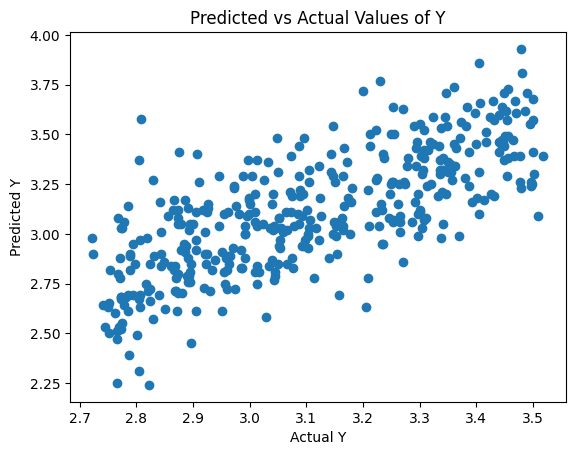

In [346]:
plt.scatter(y_pred,y_test)
plt.title("Predicted vs Actual Values of Y")
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")

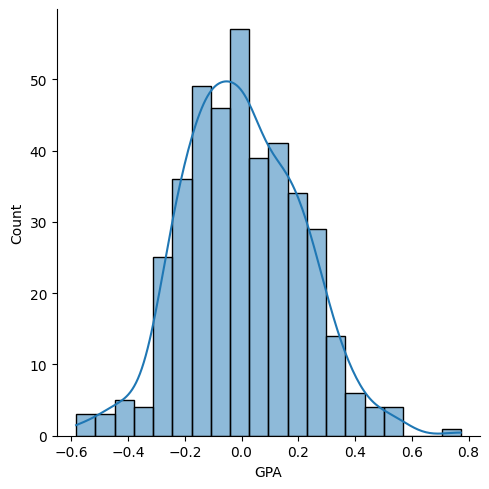

In [347]:
sns.displot(residuals,bins=20,kde=True)

In [348]:
Trial_Data = pd.DataFrame(
    [[9, 1.7, 7.3, 3.1, 2.9, 0]], 
    columns=['Study_Hours_Per_Day', 
             'Extracurricular_Hours_Per_Day', 
             'Sleep_Hours_Per_Day', 
             'Social_Hours_Per_Day', 
             'Physical_Activity_Hours_Per_Day',  
             'Stress_Level']
)
#3.58

In [349]:
predicted_gpa = regression.predict(Trial_Data)[0]
predicted_gpa


3.3578276332011843